In [24]:
1132226447%70+1

38

# Теоретическое введение

Пусть некая фирма начинает рекламировать новый товар. Необходимо, чтобы прибыль от будущих продаж покрывала издержки на дорогостоящую кампанию. Ясно, что вначале расходы могут превышать прибыль, поскольку лишь малая часть потенциальных покупателей будет информирована о новом товаре. Затем, при увеличении числа продаж, уже возможно рассчитывать на заметную прибыль, и, наконец, наступит момент, когда рынок насытится, и рекламировать товар далее станет бессмысленно.

Модель рекламной кампании основывается на следующих основных предположениях. Считается, что величина $\dfrac{dN}{dt}$ — скорость изменения со временем числа потребителей, узнавших о товаре и готовых купить его ($t$ — время, прошедшее с начала рекламной кампании, $N(t)$ – число уже информированных клиентов), — пропорциональна числу покупателей, еще не знающих о нем, т. е. величине $\alpha_1(t)(N_0 - N(t))$, где $N_0$ - общее число покупателей (емкость рынка),характеризует интенсивность рекламной кампании. Предполагается также, что узнавшие о товаре потребители распространяют полученную информацию среди неосведомленных, выступая как бы в роли дополнительных рекламных агентов фирмы. Их вклад равен величине $\alpha_2(t)N(t)(N_0-N(t))$, которая тем больше, чем больше число агентов. Величина $\alpha_2$ характеризует степень общения покупателей между собой [@stud].

В итоге получаем уравнение

$$\dfrac{dn}{dt} = (\alpha_1+\alpha_2 n(t))(N-n(t))$$


## Вариант 38

Построить график распространения рекламы, математическая модель которой описывается
следующим уравнением:

1. $\dfrac{dn}{dt} = (0.25+0.000075n(t))(N-n(t))$

2. $\dfrac{dn}{dt} = (0.000075+0.25n(t))(N-n(t))$

3. $\dfrac{dn}{dt} = (0.25\sin{(t)}+0.75 \cdot t \cdot n(t))(N-n(t))$

При этом объем аудитории $N = 1130$, в начальный момент о товаре знает 11 человек. Для случая 2 определить в какой момент времени скорость распространения рекламы будет
иметь максимальное значение.

In [25]:
using DifferentialEquations, Plots

In [26]:
f(n, p, t) = (p[1] + p[2]*n)*(p[3] - n)
f3(n, p, t) = (p[1]*sin(t) + p[2]*t*n)*(p[3]-n) 

N=1130
p1 = [0.25, 0.000075, N]
p2 = [0.000075, 0.25, N]
p3 = [0.25, 0.75, N]
n_0 = 11
tspan1 = (0.0, 20.0)
tspan2 = (0.0, 0.04)
tspan3 = (0.0, 1.0)
prob1 = ODEProblem(f, n_0, tspan1, p1)
prob2 = ODEProblem(f, n_0, tspan2, p2)
prob3 = ODEProblem(f3, n_0, tspan3, p3)

ODEProblem with uType Int64 and tType Float64. In-place: false
Non-trivial mass matrix: false
timespan: (0.0, 1.0)
u0: 11

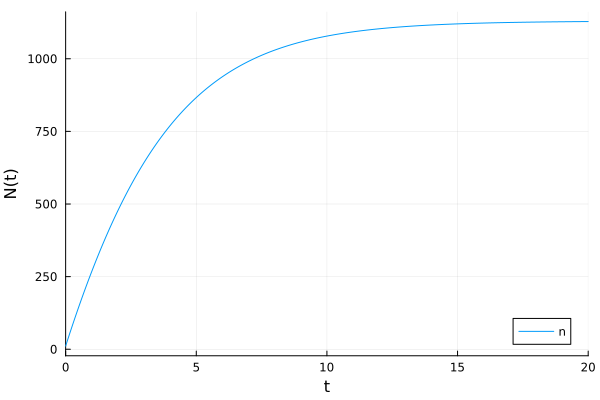

In [41]:
sol1 = solve(prob1, Tsit5(), saveat = 0.01)
plot(sol1, yaxis = "N(t)", label="n")

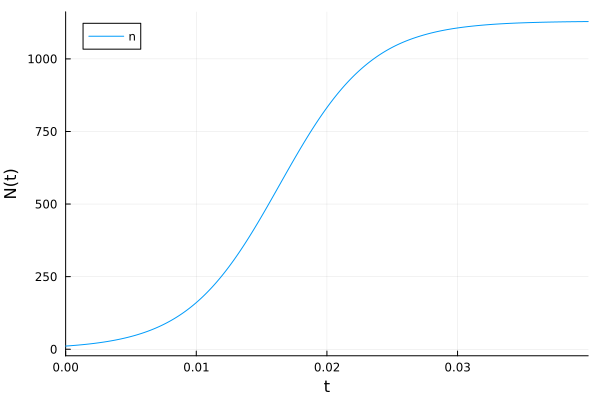

In [46]:
sol2 = solve(prob2, Tsit5(), saveat = 0.0001)
plot(sol2, yaxis="N(t)", label="n")

In [43]:
dev = [sol2(i, Val{1}) for i in 0:0.0001:0.04]
findall(x -> x == maximum(dev), dev)

1-element Vector{Int64}:
 165

In [44]:
sol2.t[165]

0.0164

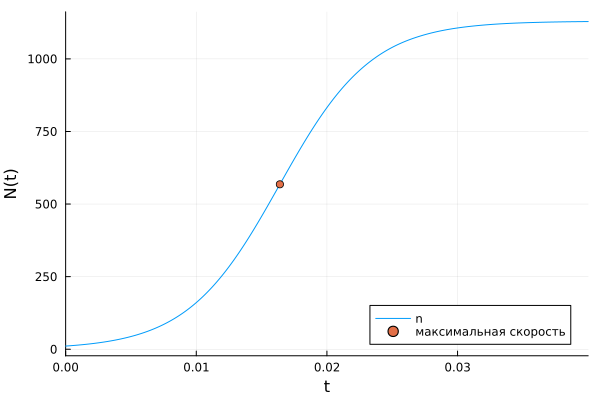

In [47]:
x = sol2.t[165]
y = sol2.u[165]
scatter!((x,y), leg=:bottomright, label="максимальная скорость")

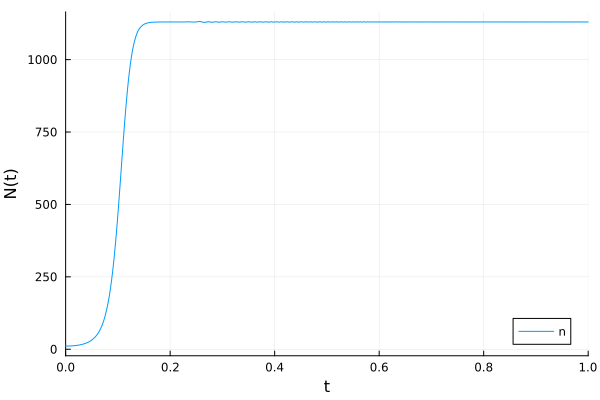

In [69]:
sol3 = solve(prob3, Tsit5(), saveat = 0.0001)
plot(sol3, markersize =:15, yaxis="N(t)", label="n")

In [67]:
dev = [sol3(i, Val{1}) for i in 0:0.0001:1]
findall(x -> x == maximum(dev), dev)

1-element Vector{Int64}:
 1066

In [68]:
sol3.t[1066]

0.1065

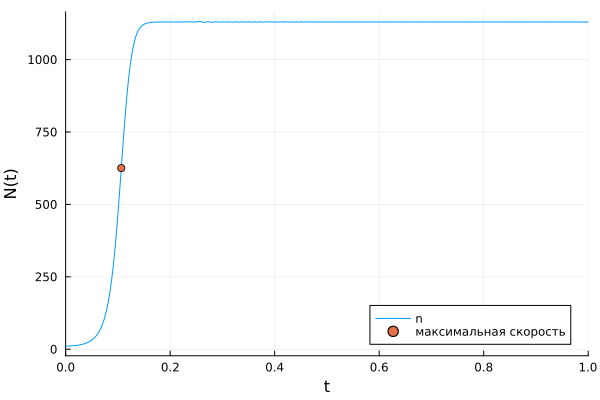

In [72]:
plot(sol3, markersize =:15, yaxis="N(t)", label="n")
scatter!((sol3.t[1066], sol3.u[1066]), label="максимальная скорость")

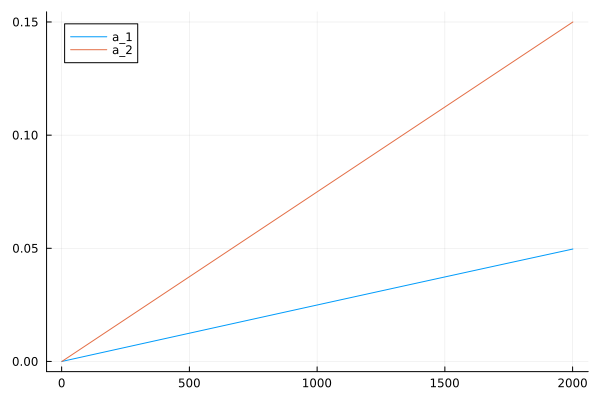

In [66]:
plot([sin(i)*0.25 for i in 0:0.0001:0.2], label="a_1")
plot!([0.75*i for i in 0:0.0001:0.2], label="a_2")

OpenModelica1

```Modelica
model lab7_1
  parameter Real a_1 = 0.25;
  parameter Real a_2 = 0.000075;
  parameter Real N = 1130;
  parameter Real n_0 = 11;
  
  Real n(start=n_0);

equation
  der(n) = (a_1 + a_2*n)*(N - n);

end lab7_1;
```

OpenModelica2

```Modelica
model lab7_2
  parameter Real a_1 = 0.000075;
  parameter Real a_2 = 0.25;
  parameter Real N = 1130;
  parameter Real n_0 = 11;
  
  Real n(start=n_0);

equation
  der(n) = (a_1 + a_2*n)*(N - n);
end lab7_2;
```

OpenModelica3

```Modelica
model lab7_3

parameter Real N = 1130;
parameter Real n_0 = 11;

Real n(start=n_0);
Real a_1;
Real a_2;

equation
  der(n) = (a_1 + a_2*n)*(N - n);
  a_1 = 0.25*sin(time);
  a_2 = 0.75*time;
  
end lab7_3;
```